In [1]:
# !pip install --upgrade scikit-learn imbalanced-learn
# !pip uninstall scikit-learn imbalanced-learn
# !pip install scikit-learn imbalanced-learn

# Subtheme Sentimant Analysis

##### Data Preprocessing

In [2]:
# Importing all the dependencies needed
import pandas as pd
import numpy as np 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('./Evaluation-dataset (1).csv', header=None) # Importing the given data

In [4]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna() # Checking the null values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10127,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
10128,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
10129,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
10130,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
df.drop(columns=[i for i in range(5, 15)], inplace=True)   # Dropping all the columns which has null values

In [7]:
df.head()

,0,1,2,3,4
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN


In [8]:
df.rename(columns={0: "Statements", 1: "review1", 2:"review2", 3:"review3", 4:"review4"}, inplace=True)  # giving column names

In [9]:
df.head(5)

,Statements,review1,review2,review3,review4
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN


In [10]:
duplicates = df["Statements"].duplicated().value_counts() # Checking duplicated values

In [11]:
duplicates

Statements
False    10128
True         4
Name: count, dtype: int64

In [12]:
df[["review1", "review2", "review3", "review4"]].isna().value_counts()  # Checking how many values are null values

review1  review2  review3  review4
False    True     True     True       3890
         False    True     True       2701
True     True     True     True       2003
False    False    False    True       1093
                           False       445
Name: count, dtype: int64

In [13]:
df.dropna(thresh=2, inplace = True)

In [14]:
df.head()

,Statements,review1,review2,review3,review4
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN


In [15]:
# Taking all the reviews at one place
Target = []
for r1 , r2, r3, r4 in zip(df.review1, df.review2, df.review3, df.review4):
        Target.append(str(r1) + ' ' + str(r2) + ' ' +  str(r3) + ' ' +  str(r4))
        
    
df["Target"] = Target

In [16]:
df.head()

,Statements,review1,review2,review3,review4,Target
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,garage service positive ease of booking positi...
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,garage service positive value for money positi...
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,value for money positive nan nan nan
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,ease of booking positive nan nan nan
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,location positive value for money positive eas...


In [17]:
# function to remove all null values from string
def remove_strna(sentence):
    sentence = sentence.replace("nan", "")
    return sentence

In [18]:
df.Target = df.Target.apply(remove_strna)

In [19]:
df.Target[1]

'garage service positive value for money positive  '

In [20]:
# !pip install vaderSentiment

In [21]:
# Creating an instance to check polarity of sentence
s_analyser = SentimentIntensityAnalyzer()

In [22]:
# Function to check the polarity of sentences
def polarity_check(text):
    pol_dict = s_analyser.polarity_scores(text)
    if pol_dict['compound'] >= 0.50:
        return 1
    elif pol_dict['compound'] <= -0.50:
        return -1
    else:
        return 0

In [23]:
df['Target_label'] = df.Target.apply(polarity_check)

In [24]:
df.head()

,Statements,review1,review2,review3,review4,Target,Target_label
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,garage service positive ease of booking positi...,1
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,garage service positive value for money positi...,1
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,value for money positive,1
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,ease of booking positive,1
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,location positive value for money positive eas...,1


In [25]:
df.drop(columns=["review1", "review2", "review3", "review4", "Target"], inplace=True) # dropping not needed columns

In [26]:
df.head()

,Statements,Target_label
0,Tires where delivered to the garage of my choi...,1
1,"Easy Tyre Selection Process, Competitive Prici...",1
2,Very easy to use and good value for money.,1
3,Really easy and convenient to arrange,1
4,It was so easy to select tyre sizes and arrang...,1


In [27]:
df[df.duplicated()] # checking duplicates

,Statements,Target_label
3658,Value for money,1
4857,Very competitive pricing,1


In [28]:
df.drop_duplicates(inplace=True) # removing duplicates

In [29]:
df[df.duplicated()].value_counts()

Series([], Name: count, dtype: int64)

In [30]:
df.shape

(8127, 2)

In [31]:
df.Target_label.value_counts()

Target_label
 1    6819
-1     951
 0     357
Name: count, dtype: int64

In [32]:
# Function for tokenisation
def tokens(data):
    tokens = re.findall('\w+', data)
    return tokens

In [33]:
df.Statements = df.Statements.apply(tokens) # tokenising

In [34]:
# downloading all stopwords
stopwords = stopwords.words('english')

In [35]:
# Function to remove all the stopwords
def remove_stopwords(data):
    words = [i for i in data if i not in stopwords]
    return words

In [36]:
df.Statements = df.Statements.apply(remove_stopwords)

In [37]:
# creating an instance for stemming
p_stemmer = PorterStemmer()

In [38]:
# function to lowercase the sentences/words
def lower(data):
    lower_words = [i.lower() for i in data]
    return lower_words

In [39]:
df.Statements = df.Statements.apply(lower)

In [40]:
df.head()

,Statements,Target_label
0,"[tires, delivered, garage, choice, garage, not...",1
1,"[easy, tyre, selection, process, competitive, ...",1
2,"[very, easy, use, good, value, money]",1
3,"[really, easy, convenient, arrange]",1
4,"[it, easy, select, tyre, sizes, arrange, local...",1


In [41]:
df.Statements[1]

['easy',
 'tyre',
 'selection',
 'process',
 'competitive',
 'pricing',
 'excellent',
 'fitting',
 'service']

In [42]:
# Function for stemming
def stemming(data):
    stemmed_sentence = [p_stemmer.stem(i) for i in data]
    return stemmed_sentence

In [43]:
df.Statements = df.Statements.apply(stemming)

In [44]:
df.Statements

0        [tire, deliv, garag, choic, garag, notifi, del...
1        [easi, tyre, select, process, competit, price,...
2                     [veri, easi, use, good, valu, money]
3                          [realli, easi, conveni, arrang]
4        [it, easi, select, tyre, size, arrang, local, ...
                               ...                        
10125    [never, issu, tyre, fit, garag, äôve, use, via...
10126         [easi, order, tyre, choic, garag, tyre, fit]
10127    [i, order, wrong, tyre, howev, redact, arrang,...
10128    [good, experi, first, time, i, use, redact, ha...
10129    [i, order, tyre, i, need, line, book, specifi,...
Name: Statements, Length: 8127, dtype: object

In [45]:
# creating an instance for undersampling
rus = RandomUnderSampler(random_state=50)

In [46]:
x = df.drop(['Target_label'], axis=1)
y = df['Target_label']

In [47]:
X_resampled, y_resampled = rus.fit_resample(x, y) # resampling the data

In [48]:
X_resampled.shape

(1071, 1)

In [49]:
X_resampled

,Statements
8289,"[whi, tri, experi, great, money, save, adventu..."
1766,"[custom, servic, receiv, shock, complaint, rai..."
2906,"[i, order, 4, tyre, one, wrong, size]"
9135,"[i, purchas, 2, tyre, redact, fit, home, extra..."
4066,"[a, delay, abl, get, tyre, 3, 4, wheel, scratc..."
...,...
7165,"[good, price, punctual, appoint, tri, sell, wh..."
1830,"[best, valu, tyre, good, rang, avail, deliv, l..."
2115,"[easi, order, onlin, staff, locu, effici, frie..."
5472,"[thank, easi, use, websit, great, price, servic]"


In [50]:
# function for joining the strings
def join(data):
    joined = ' '.join(data)
    return joined

In [51]:
X_resampled.Statements = X_resampled.Statements.apply(join)

In [52]:
X_resampled

,Statements
8289,whi tri experi great money save adventur choos...
1766,custom servic receiv shock complaint rais week...
2906,i order 4 tyre one wrong size
9135,i purchas 2 tyre redact fit home extra 6 charg...
4066,a delay abl get tyre 3 4 wheel scratch fitter ...
...,...
7165,good price punctual appoint tri sell wheel ali...
1830,best valu tyre good rang avail deliv local fit...
2115,easi order onlin staff locu effici friendli wi...
5472,thank easi use websit great price servic


In [53]:
y_resampled.value_counts()

Target_label
-1    357
 0    357
 1    357
Name: count, dtype: int64

In [54]:
# Vectorising the words
vec = TfidfVectorizer(min_df=10, ngram_range=(1,4))
X_vec = vec.fit(X_resampled.Statements)

In [55]:
X_vec = X_vec.transform(X_resampled.Statements).toarray()

In [56]:
X_vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
X_vec.shape

(1071, 534)

##### Splitting the data in training data and testing data

In [58]:
# Training and splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_resampled, test_size=0.20, random_state=80)

In [59]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(856, 534) (215, 534) (856,) (215,)


##### Model selection and training

In [60]:
# creating an instance for model
k_clf = KNeighborsClassifier(n_neighbors=5)

In [61]:
k_clf.fit(X_vec, y_resampled)

KNeighborsClassifier()

In [62]:
prediction_testdata = k_clf.predict(X_test) # predicting values

##### Checking accuracy

In [63]:
print(classification_report(y_test, prediction_testdata)) # classification report

              precision    recall  f1-score   support

          -1       0.73      0.94      0.82        70
           0       0.77      0.73      0.75        73
           1       0.95      0.74      0.83        72

    accuracy                           0.80       215
   macro avg       0.82      0.80      0.80       215
weighted avg       0.82      0.80      0.80       215



In [64]:
accuracy_score(prediction_testdata, y_test)

0.8

In [65]:
classification_report = classification_report(y_test, prediction_testdata)

In [66]:
import seaborn as sns
c_matrix = confusion_matrix(y_test, prediction_testdata)

<Axes: >

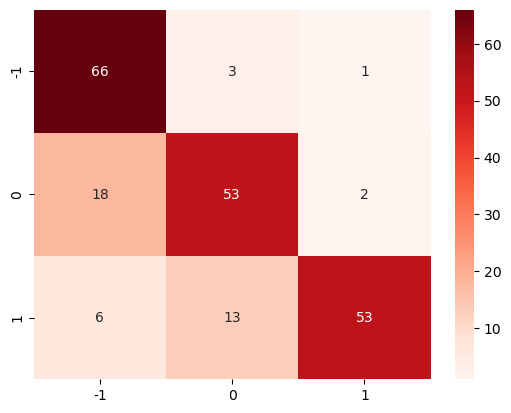

In [74]:
sns.heatmap(c_matrix, annot=True, xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1], cmap="Reds")